# Airbnb: predicción de precios de hosts

In [31]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("airbnb_data.csv")

In [4]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
2,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,...,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,...,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,100.0


In [14]:
df.shape

(28877, 28)

In [20]:
df.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'price'],
      dtype='object')

In [24]:
df[['first_review', 'host_has_profile_pic','host_identity_verified', 'host_response_rate', 'host_since','instant_bookable', 'last_review']].head()

,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review
0,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23
1,2017-08-27,t,t,100%,2017-06-07,t,2017-09-05
2,2016-12-16,t,t,100%,2013-05-18,f,2017-04-12
3,2016-02-13,t,f,100%,2015-06-04,f,2017-09-24
4,2013-04-28,t,t,100%,2013-03-27,f,2016-11-15


# Limpieza de los datos

### Tareas por hacer:
1. Ver colinealidades entre variables contínuas
2. Limpieza de categóricas: property_type, room_type, bed_type, cancellation_policy, cleaning_fee, city,'first_review,host_has_profile_pic,host_identity_verified, host_response_rate, host_since,instant_bookable, last_review.
3. Separar los valores de "amenities" en distintas columnas.
4. Ver la manera de pasar a nominal la columna neighbourhood o dropearla.
5. Dropear columna description, longitude?,name,thumbnail_url.
6. De categóricas a nominal: One-Hot-Encoding, Label-encoding?
6. NaN's

## 1. Colinealidades

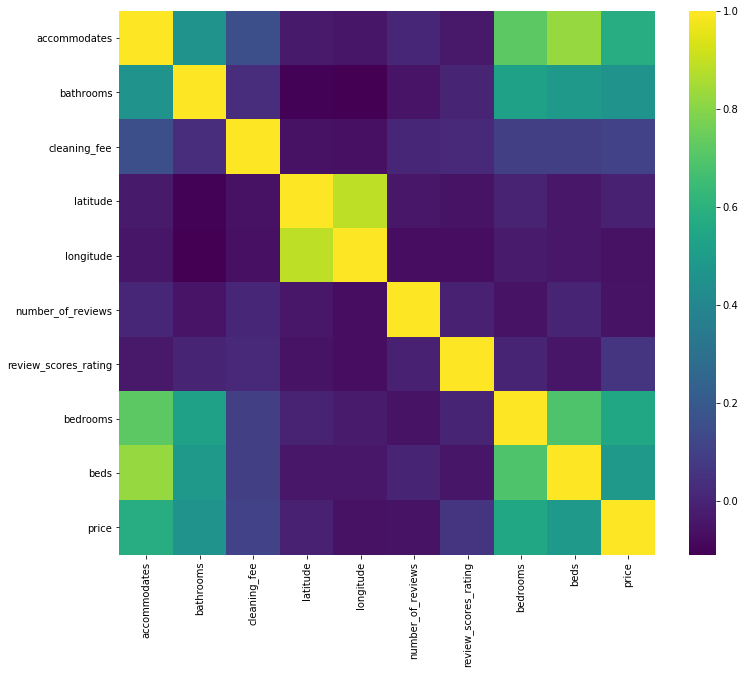

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='viridis');

In [28]:
#En este momento, la única correlación alta que existe es entre latitud y longitud.
#Como no usare estas columnas, las dropeare.
df.drop("latitude", axis=1, inplace=True)
df.drop("longitude", axis=1, inplace=True)

In [29]:
df.shape

(28877, 26)

## 2. Limpieza de categóricas

### property_type

In [8]:
df.property_type.value_counts()

Apartment             18543
House                  6655
Condominium            1081
Townhouse               720
Loft                    552
Other                   260
Guesthouse              248
Bed & Breakfast         214
Bungalow                166
Guest suite              72
Dorm                     61
Villa                    54
In-law                   44
Hostel                   36
Cabin                    32
Timeshare                26
Camper/RV                24
Boat                     22
Boutique hotel           20
Castle                    9
Serviced apartment        9
Tent                      7
Chalet                    4
Vacation home             4
Hut                       4
Tipi                      3
Treehouse                 2
Cave                      2
Earth House               2
Yurt                      1
Name: property_type, dtype: int64

In [ ]:
#voy a tomar en cuenta los primeros 6 conceptos, ya que se llevan más del 90% de los datos. 
#A los demás los voy a clasificar como 'Others'

In [30]:
for e in range(len(df)):
    if df.property_type[e] not in ['Apartment','House','Condominium','Townhouse','Loft','Guesthouse']:
        df.property_type[e] = "Other"

C:\Users\luisf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df.property_type.value_counts()

Apartment      18543
House           6655
Condominium     1081
Other           1078
Townhouse        720
Loft             552
Guesthouse       248
Name: property_type, dtype: int64

### room_type

In [33]:
df.room_type.value_counts()

Entire home/apt    16158
Private room       11993
Shared room          726
Name: room_type, dtype: int64

### bed_type

In [34]:
df.bed_type.value_counts()
#Casi el 100% de los datos estan concentrados en "Real Bed". No se si esto represente un sezgo para el modelo después.
#Aun si pusiera como "Others" los demás valores, creo que no tiene mucho caso esta columna.

Real Bed         28092
Futon              319
Pull-out Sofa      246
Airbed             146
Couch               74
Name: bed_type, dtype: int64

In [35]:
df.drop("bed_type", axis=1, inplace=True)

In [36]:
df.shape

(28877, 25)

### cancellation_policy

In [37]:
df.cancellation_policy.value_counts()
#Voy a integrar los valores "super_strict" como "strict"

strict             14816
moderate            8492
flexible            5539
super_strict_30       25
super_strict_60        5
Name: cancellation_policy, dtype: int64

In [38]:
for e in range(len(df)):
    if "super_" in df.cancellation_policy[e]:
        df.cancellation_policy[e] = "strict"

In [39]:
df.cancellation_policy.value_counts()

strict      14846
moderate     8492
flexible     5539
Name: cancellation_policy, dtype: int64

### cleaning_fee

In [40]:
df.cleaning_fee.value_counts()
#ya lista para pasar a contínua

True     23693
False     5184
Name: cleaning_fee, dtype: int64

### city

In [42]:
df.city.value_counts()
#ya lista para pasar a contínua

NYC        13379
LA          7571
SF          2713
DC          1815
Boston      1776
Chicago     1623
Name: city, dtype: int64

### description

In [43]:
df.description.value_counts()
#Demasiado complicado utilizar esta variable para el modelo:
    #diferentes idiomas
    #tendrías que encontrar comunes palabras? o algún denominador que te permita clasificar la descripción en distintos niveles

Hello, I've been running guest house for Koreans visiting U.S. for 3years, and recently decided to run this place for other travelers also. There are 10 room in the house. They are mostly dormitory rooms and couple of couple room and family room. This places are our women's dormitory in third floor. There are three rooms, but no doors. It is basically open space. There are 2 beds in two rooms and 4 in one room. I do not have closet in this room but there are hangers and mini shelves. My travelers usually put their baggage on the floor. There is one full bathroom only for women in 2nd floor, which you will be sharing with other women guests. Right next that bathroom, there is unisex half bathroom. All bathrooms have hair dryers. You cannot use kitchen, but you can use refrigerator.  I offer breakfast every morning from 7-10 am. Bread, cereal, fruits, coffee, milk and juice will be served. You can eat take-out food in the kitchen, but please wash dishes that you used and put trash in the

In [44]:
df.drop("description", axis=1, inplace=True)

In [45]:
df.shape

(28877, 24)

### name

In [46]:
df.name.value_counts()
#mismo tema con description

Brooklyn Oasis                                        4
SHARED ROOM in VENICE BEACH HOSTEL                    3
Venice Beach Cottage                                  3
East Village Gem                                      3
Bunk bed in the Treat Street Clubhouse                3
Spacious Private Room in Brooklyn                     3
Make的小屋（地理位置好，交通方便，洛杉矶市中心，提供机场名牌店景点等接送，包车游玩等服务）       3
Private 1 Bedroom Apartment                           3
West Village 1 Bedroom Apartment                      2
Spacious Apartment                                    2
Beautiful Private Room near University of Chicago     2
In the city!Central park!                             2
Lux 2 BR in the Heart of Fenway w/WiFi                2
Luxury Upper East Side Apartment                      2
舒适双人房                                                 2
Luxury Condo - JP/BU/Fenway/Longwood/downtown/MBTA    2
Bright and spacious 1 bedroom                         2
Comfortable shared room in Manhattan Chinatown  

In [47]:
df.drop("name", axis=1, inplace=True)

In [48]:
df.shape

(28877, 23)

### neighbourhood

In [19]:
df.neighbourhood.value_counts().head(n=80)

Williamsburg                        1139
Bedford-Stuyvesant                  1017
Mid-Wilshire                         660
Bushwick                             649
Hell's Kitchen                       604
Harlem                               592
Hollywood                            568
Upper West Side                      510
Upper East Side                      501
Venice                               495
Crown Heights                        461
Astoria                              368
East Harlem                          363
Mission District                     346
Lower East Side                      337
East Village                         314
Chelsea                              289
Long Beach                           278
West Hollywood                       275
Washington Heights                   269
Hamilton Heights                     267
Santa Monica                         261
Greenpoint                           260
Alphabet City                        251
Clinton Hill    

In [58]:
print(len(df.neighbourhood[df.city == 'NYC']),
        len(df.neighbourhood[df.city == 'LA']),
        len(df.neighbourhood[df.city == 'SF']),
        len(df.neighbourhood[df.city == 'DC']),
        len(df.neighbourhood[df.city == 'Boston']),
        len(df.neighbourhood[df.city == 'Chicago'])
     )

13379 7571 2713 1815 1776 1623


In [56]:
df.neighbourhood[df.city == 'NYC'].value_counts().head(n=10)

Williamsburg          1139
Bedford-Stuyvesant    1017
Bushwick               649
Hell's Kitchen         604
Harlem                 592
Upper West Side        510
Upper East Side        501
Crown Heights          461
Astoria                368
East Harlem            363
Name: neighbourhood, dtype: int64

In [57]:
df.neighbourhood[df.city == 'LA'].value_counts().head(n=10)

Mid-Wilshire      660
Hollywood         568
Venice            495
Long Beach        278
West Hollywood    275
Santa Monica      261
Silver Lake       210
Echo Park         186
Pasadena          170
Downtown          167
Name: neighbourhood, dtype: int64

In [16]:
df.isnull().sum()

property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
price                     0
dtype: int64